# Lesson: Linear Regression

## Introduction

Linear regression is a fast and simple model to predict a dependent variable from one or more independent variables. When you have only one independent variable, it is referred to as **simple linear regression**, otherwise it's **multiple linear regression**.

### Learning Outcomes

By the end of this lesson, you will be able to:

- Explain how linear regression works.
- Check the assumptions of linear regression.
- Fit and predict a linear regression model.
- Use visualizations.

## How the Algorithm Works

Linear regression requires a dataset and builds a model in the form: y = b + c<sub>1</sub>x<sub>1</sub> + c<sub>2</sub>x<sub>2</sub> + c<sub>3</sub>x<sub>3</sub> + ... Each x<sub>i</sub> represents a feature and each c<sub>i</sub> is the coefficient. `b` is the intercept. (Think back to your Algebra I class, `y = mx + b`, with a linear equation.)

In traditional linear regression, we use **ordinary least squares (OLS)**. Each coefficient, c<sub>i</sub>, makes the squared residuals as small as possible. Residuals are the difference between observed values and predicted values. If the observed value is 3.1 and the model predicted 3.4, the residual would be -0.3 and the squared residual would be 0.09.

<img src="../assets/ordinary-least-squares.png" alt="Ordinary Least Squares" style="max-width: 50%;">

In the image above, the green lines represent residuals. The blue line "optimizes" for predicted values. The observed values want to minimize the sum of the squared residuals.

A common starting point for machine learning is OLS linear regression. It's relatively simple and has nice mathematical properties. Don't underestimate it because of it's simplicity. It's widely used in industry and academia. There are many ways to extend and modify [linear models](https://scikit-learn.org/stable/api/sklearn.linear_model.html) to make them more flexible and powerful.

### Assumptions of Linear Regression

Every algorithm has its limitations. For OLS linear regression, check the following assumptions (or violations).

**Linearity**: The relationship between independent and dependent variables must be linear. It cannot directly use interactions between features (such as x<sub>1</sub>x<sub>2</sub>) or transformations of features (such as x<sub>1</sub><sup>2</sup>). 

Plots: scatter, residual

---

**Independence of Errors**: The residuals should not correlate with each other. Errors don't influence each other. Example: today's residual (error) should not depend on tomorrow's residual (error).

Plots: time-series

---

**Homoscedasticity**: The residuals should have constant variance across all predicted values. The residuals can have very large values or very small. Regardless, they should be constant. **Hetroscedasticity**, a cone or fan shape, is a violation.

![Homoscedasticity, Hetroscedasticity](../assets/homoscedasticity-hetroscedasticity.png)

Plots: residual, fitted

---

**Normal distribution**: Residuals should be normally distributed. (We can make predictions without normal distributions.) This is relevant in industry and academia because of p-values and testing our hypothesis.

Plots: histogram, Q-Q

---

**No perfect multicollinearity**: When features are perfectly correlated with each other. 

We cannot include features like:
- "building height in meters" vs. "building stories"
- "celestial body mass" vs. "celestial body gravity"
- "human height inches" vs. "human height centimeters"
- "price", "tax" vs. "price with tax"

...without a violation.

Plots: correlation matrix

## Model Evaluation

Linear regression and most other regression algorithms can be assessed by their **coefficient of determination**.

R<sup>2</sup> = 1 - (SS<sub>res</sub> / SS<sub>tot</sub>)

SS<sub>res</sub>: Residual Sum of Squares  
SS<sub>tot</sub>: Total Sum of Squares

- R<sup>2</sup> -> 1: The model explains _all_ variability, which will never happen in a real-world dataset. 
- R<sup>2</sup> -> 0: The model explains _none_ of the variability.
- R<sup>2</sup> can be negative

Values of 0.75, 0.50, or 0.25 can be described as substantial, moderate, or weak. This varies based on the domain. 

The `train_test_split` function includes all dependent (target) and independent variables (features). The `LinearRegression` training set [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)s our model with coefficients (slopes) and a single intercept. Then we use the test set to [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict).

In [61]:
# We don't need to manually calculate the R² score.
# We can use sklearn's built-in function.
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = LinearRegression().fit(X_train, y_train)

print("Model coefficient:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)

print(f"Coefficient of determination: {model.score(X_test, y_test):.2f}")

Model coefficient: [975.27698313]
Model intercept: 152.07653296894017
Coefficient of determination: 0.32


## Visualizations w/ LinearRegression

Model coefficient: [49.5057081]
Model intercept: -5741.264904359061
Coefficient of determination: 0.78


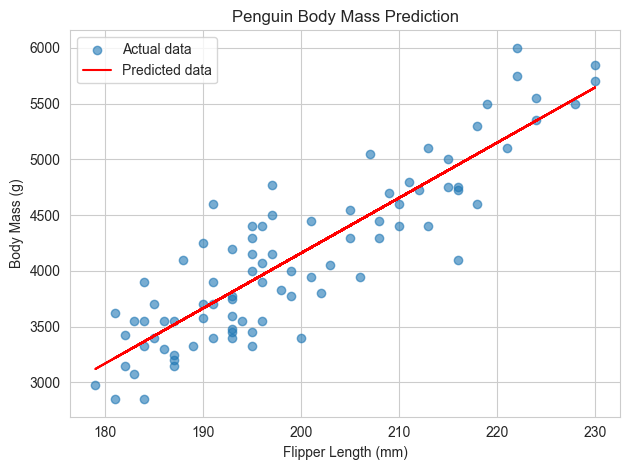

In [62]:
# simple linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

penguins_df = pd.read_csv("../data/penguins_clean.csv")
penguins_df.replace("NA", np.nan, inplace=True)
penguins_df.dropna(subset=["flipper_length_mm", "body_mass_g"], inplace=True)

target = penguins_df.pop("body_mass_g")
features = penguins_df[["flipper_length_mm"]]

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=42
)

model = LinearRegression().fit(X_train, y_train)

print("Model coefficient:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)

print(f"Coefficient of determination: {model.score(X_test, y_test):.2f}")

sns.set_style("whitegrid")
plt.scatter(X_test, y_test, alpha=0.6, label="Actual data")
plt.plot(X_test, y_pred, color="red", label="Predicted data")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Penguin Body Mass Prediction")
plt.legend()
plt.tight_layout()
plt.show()

### Trendlines

There are various trendlines using Numpy, Scipy, and linear models.

Numpy slope: 50.20113128083263, intercept: -5893.60236894001
Scipy slope: 50.20113128083261, intercept: -5893.602368940011
LinearRegression coefficient: 49.50570810333235, intercept: -5741.264904359061


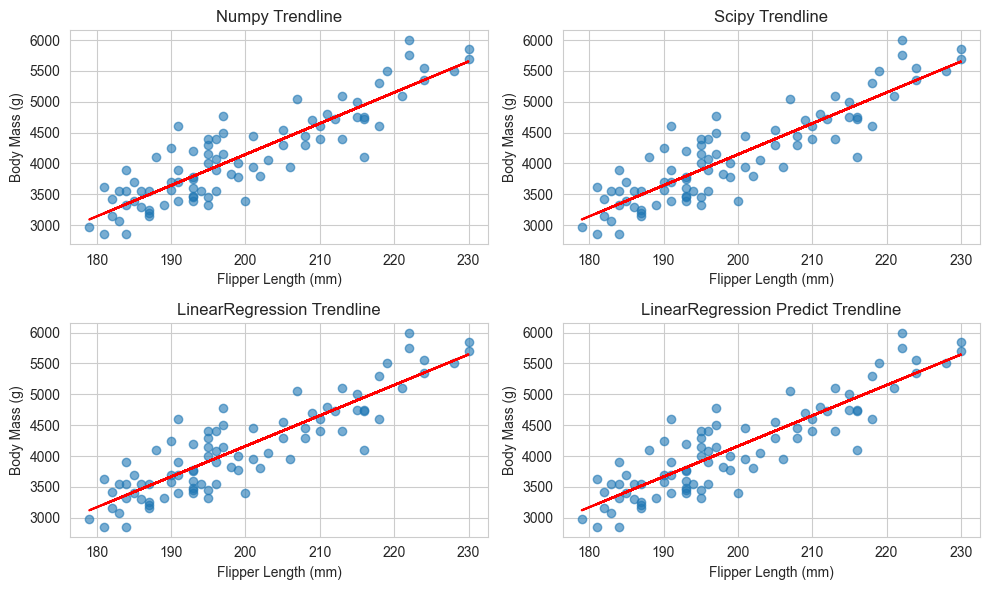

In [63]:
import scipy.stats

sns.set_style("whitegrid")

flipper_series = X_test["flipper_length_mm"]

# Numpy
m, b = np.polyfit(flipper_series, y_test, 1)
# Scipy
slope, intercept, r, p, stderr = scipy.stats.linregress(flipper_series, y_test)

print(f"Numpy slope: {m}, intercept: {b}")
print(f"Scipy slope: {slope}, intercept: {intercept}")
print(
    f"LinearRegression coefficient: {model.coef_[0]}, intercept: {model.intercept_}"
)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
for ax in axes.flatten():
    ax.scatter(flipper_series, y_test, alpha=0.6)
    ax.set_xlabel("Flipper Length (mm)")
    ax.set_ylabel("Body Mass (g)")


# Numpy trendline
axes[0, 0].plot(flipper_series, m * flipper_series + b, color="red")
axes[0, 0].set_title("Numpy Trendline")
# Scipy trendline
axes[0, 1].plot(flipper_series, slope * flipper_series + intercept, color="red")
axes[0, 1].set_title("Scipy Trendline")
# LinearRegression coefficient and intercept trendline
axes[1, 0].plot(
    flipper_series,
    model.coef_[0] * flipper_series + model.intercept_,
    color="red",
)
axes[1, 0].set_title("LinearRegression Trendline")
# LinearRegression predict method trendline
axes[1, 1].plot(flipper_series, y_pred, color="red")
axes[1, 1].set_title("LinearRegression Predict Trendline")

plt.tight_layout()
plt.show()


Model coefficients: [49.4807116   4.41850423 13.46354417]
Model intercept: -6160.679214523008
Coefficient of determination: 0.79


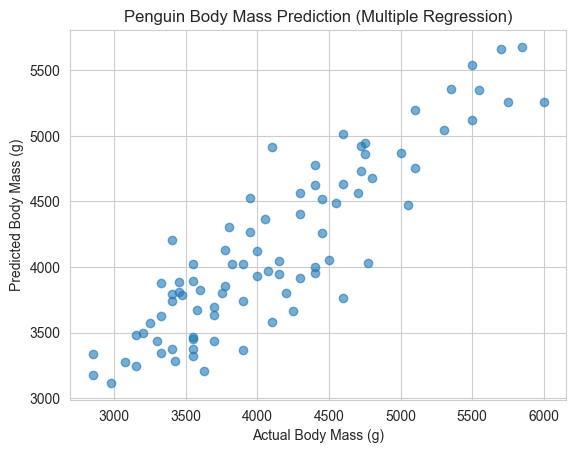

In [64]:
# multiple linear regression
feature_names = ["flipper_length_mm", "bill_length_mm", "bill_depth_mm"]
features = penguins_df[feature_names]

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=42
)

model = LinearRegression().fit(X_train, y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)

print(f"Coefficient of determination: {model.score(X_test, y_test):.2f}")

sns.set_style("whitegrid")
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Body Mass (g)")
plt.ylabel("Predicted Body Mass (g)")
plt.title("Penguin Body Mass Prediction (Multiple Regression)")
plt.show()

### Residuals

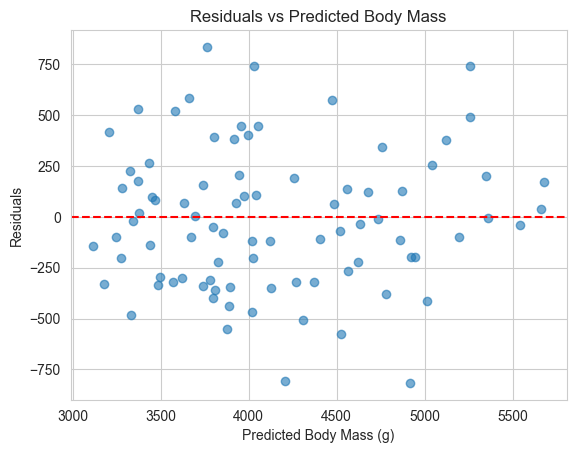

In [65]:
residuals = y_test - y_pred
sns.set_style("whitegrid")
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Body Mass (g)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Body Mass")
plt.show()

There are three independent variables: "flipper_length_mm", "bill_length_mm", "bill_depth_mm", that depend on "body_mass_g". 

The orange trendlines are just basic simple linear regression:
- flipper_length_mm vs body_mass_g
- bill_length_mm vs body_mass_g
- bill_depth_mm vs body_mass_g

The crimson trendlines are more complex. They have full multi-linear regression.

1. Features adjust to the mean: `feature_means`.
2. Feature means explode into 100 values with a Pandas DataFrame: `X_pred`.
3. A single feature has a min/max value that has 100 intervals ([linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)): `x_range`.
4. The mean feature DataFrame column gets replaced with `x_range`.
5. Then we `predict`: `y_predict_line`.

Our flipper_length_mm is strongly correlated with body_mass_g. The orange and crimson trendlines match. bill_length_mm and bill_depth_mm with body_mass_g, not so much. We need to use our imagination to "see" things in 3D.

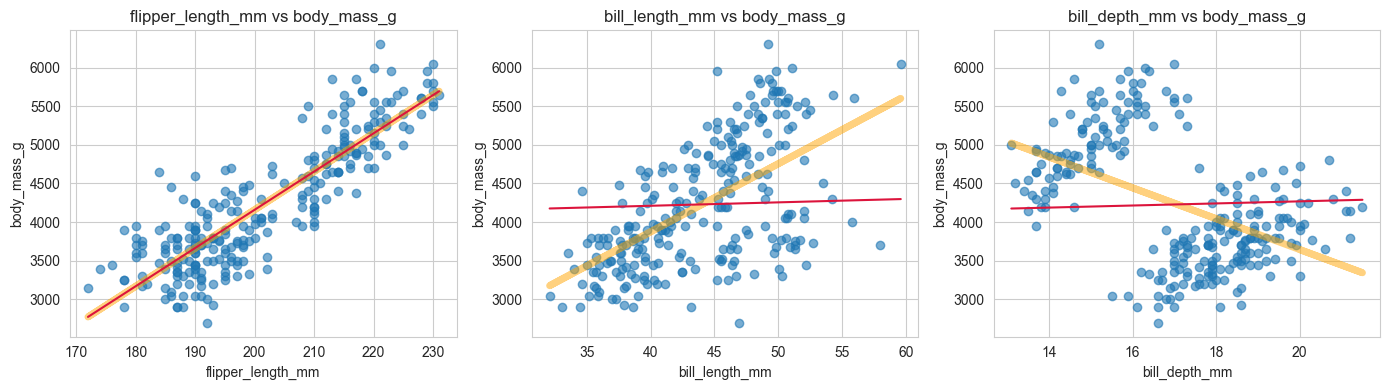

In [66]:
feature_means = X_train.mean()
range_length = 100

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, len(feature_names), figsize=(14, 4))

for ax, name in zip(axes, feature_names):
    feature = X_train[name]  # Series

    ax.scatter(feature, y_train, alpha=0.6)

    m, b = np.polyfit(feature, y_train, 1)

    # Build a DataFrame where all features are set to their mean
    X_pred = pd.DataFrame([feature_means] * range_length)
    X_pred = X_pred.reset_index(drop=True)

    x_range = np.linspace(feature.min(), feature.max(), range_length)
    # Replace the current feature with the range of values
    X_pred[name] = x_range

    # Use the full multivariate model to predict y
    y_predict_line = model.predict(X_pred)

    # Use simple linear regression trendline
    ax.plot(feature, m * feature + b, color="orange", lw=5, alpha=0.5)

    ax.plot(x_range, y_predict_line, color="crimson")

    ax.set_title(f"{name} vs body_mass_g")
    ax.set_xlabel(name)
    ax.set_ylabel("body_mass_g")

plt.tight_layout()
plt.show()

Those are fairly complicated visualizations. We'll keep it simple with oncoming exercises.